<a href="https://colab.research.google.com/github/Ludgeroxd/IA-/blob/main/Trab_IA_12_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import Sequence
from keras.models import Model, Sequential
from keras.layers import Input, Conv1D, Dense, Flatten


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings("ignore")

In [ ]:
def define_model():
	# carregar o modelo
	model = Sequential()
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	for layer in model.layers:
		layer.trainable = False
	# adicionar nova camada
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# definir o modelo
	model = Model(inputs=model.inputs, outputs=output)
	# compilar o modelo
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
def summary(history):
    plt.figure(figsize=(10, 8))
    # plotar erro
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()

    # plotar acurácia
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

    plt.show()

In [ ]:
def run_test_harness():
# definir modelo
	model = define_model()
	# criar data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# centralizar a imagem
	datagen.mean = [123.68, 116.779, 103.939]
	# preparar interação das imagens
	train_it = datagen.flow_from_directory('/content/drive/MyDrive/Imagens Trab',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# rodar o modelo
	history = model.fit(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)

	# salvar o modelo
	model.save('final_model.keras')

	summary(history)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 25 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.6800 - loss: 4.9156
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5200 - loss: 54.2125
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 8.6800e-15
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 2.3351e-10
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9600 - loss: 0.3740
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.9600 - loss: 0.1527
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 1.2399e-06
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 1.3593e-09
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 7.0405e-12
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 1.0755e-13


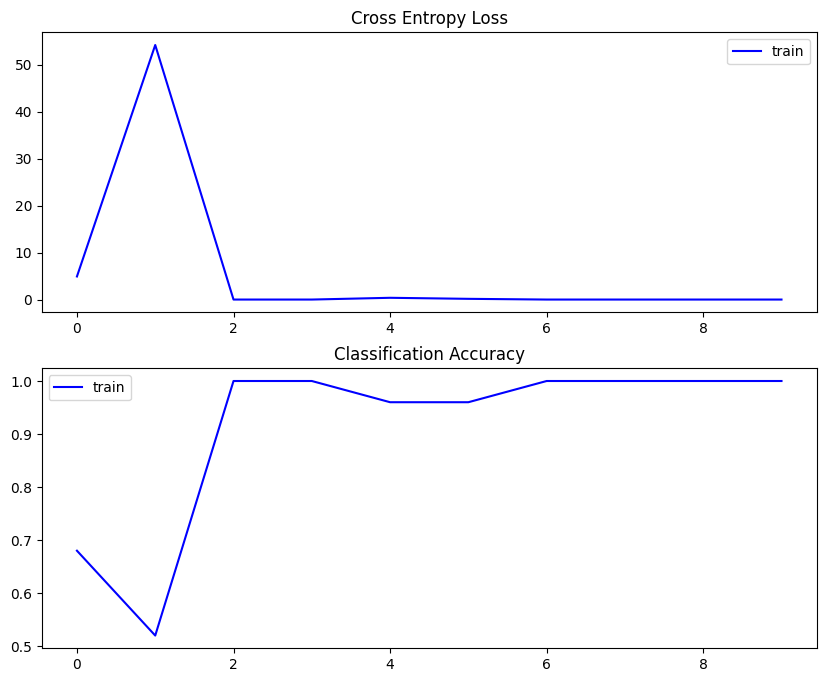

In [ ]:
# entry point, run the test harness
run_test_harness()

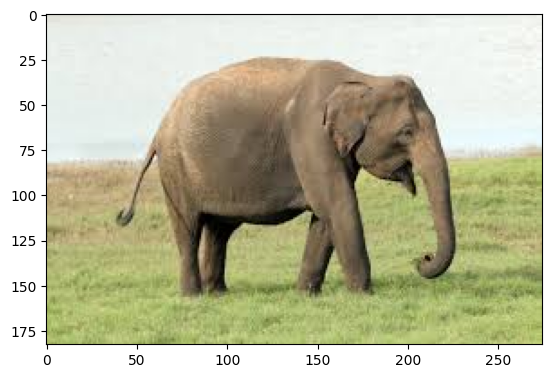

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Imagens Trab/elefante/download (1).jpeg')
imgplot = plt.imshow(img)
plt.show()

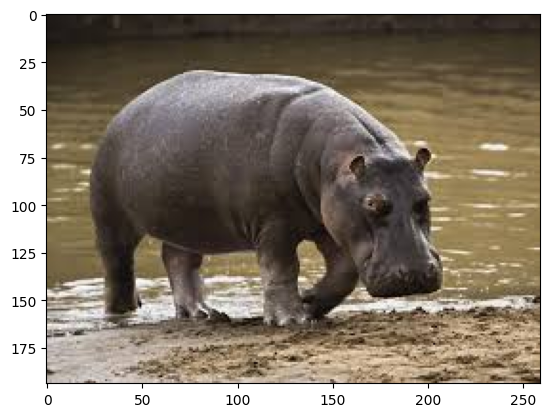

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Imagens Trab/hipopotamo/download (1).jpeg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from keras.models import load_model
model1 = load_model('/content/final_model.keras')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
imagens = datagen.flow_from_directory('/content/drive/MyDrive/Imagens Trab',
		class_mode='binary', batch_size=64, target_size=(224, 224))


previsto = model1.predict(imagens)
print(previsto)

Found 25 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.3056218e-24]
 [6.2366663e-19]
 [5.5418046e-19]
 [1.0000000e+00]
 [0.0000000e+00]
 [2.3797973e-16]
 [1.0000000e+00]
 [1.4840147e-25]
 [5.9728342e-27]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [6.8210269e-14]
 [9.7148354e-31]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4676255e-19]
 [2.6397556e-25]
 [1.0000000e+00]
 [1.0000000e+00]]


In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
for i in previsto:
  if i>0.5:
    print('elefante')
  else:
    print('hipopotamo')

elefante
elefante
elefante
elefante
hipopotamo
hipopotamo
hipopotamo
elefante
hipopotamo
hipopotamo
elefante
hipopotamo
hipopotamo
hipopotamo
hipopotamo
elefante
hipopotamo
hipopotamo
elefante
elefante
elefante
hipopotamo
hipopotamo
elefante
elefante
